In [4]:
import tensorflow as tf







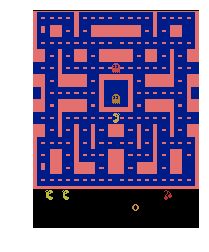

In [2]:
import gym
import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
env = gym.make('MsPacman-v0')

frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample() # play randomly
    obs, reward, done, info = env.step(action)
    if done:
        break

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

video = plot_animation(frames)
plt.show()

In [1]:
import tensorflow as tf
tf.reset_default_graph()
initializer = tf.variance_scaling_initializer()


#X = tf.placeholder(tf.float32, shape=[None, 2])
#y = X[0][0] * X[0][1]
#hidden = tf.layers.dense(X, 2, kernel_initializer=initializer)
#logits = tf.layers.dense(hidden, 1)

X = tf.Variable(5.)
Y = tf.Variable(4.)
res = X * 3 + Y * 5

# optimizer = tf.train.AdamOptimizer(0.5)
optimizer = tf.train.GradientDescentOptimizer(0.1)
#cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=[[5.]], logits=hidden)
grads_and_vars = optimizer.compute_gradients(res)
# gradients = [grad for grad, variable in grads_and_vars]

feed = []
for grad, variable in grads_and_vars:
    # grad = tf.Variable(0.1)
    feed.append((grad, variable))
    
training_op = optimizer.apply_gradients(feed)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(res))
    grads_and_vars_result = sess.run(grads_and_vars, feed_dict={})
    print(":",grads_and_vars_result)
    applied = sess.run(training_op)
    print("::",applied)
    grads_and_vars_result2 = sess.run(grads_and_vars, feed_dict={})
    print(":::",grads_and_vars_result2)
    

/Users/daniel/Workspace/Checkouts/python-ml/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


35.0
: [(3.0, 5.0), (5.0, 4.0)]
:: None
::: [(3.0, 4.7), (5.0, 3.5)]


In [5]:
import numpy as np

def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    
    for step in reversed(range(len(rewards))):
        print(step)
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    # return flat_rewards
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std for discounted_rewards in all_discounted_rewards]

print(discount_and_normalize_rewards([[10, 0, -50], [10, 0, -50]], discount_rate=0.8))
#discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

ModuleNotFoundError: No module named 'numpy'